In [1]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import export_graphviz
import pydot

In [2]:
# Load dataset
data = pd.read_csv('Data Penjualan - Sheet1.csv')

In [4]:
# Pisahkan variabel input dan target
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [11]:
# Hitung mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Hitung Z-score for each data point
z_scores = (data - mean) / std_dev

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [12]:
# Define threshold for outlier detection
threshold = 3

# Identify outliers
outliers = np.where(np.abs(z_scores) > threshold)
# Print results
print("Data: ", data)
print("Z-scores: ", z_scores)
print("Outliers: ", outliers)

Data:         X  Y
0      1  1
1      2  1
2      3  2
3      4  5
4      5  5
..   ... ..
151  152  3
152  153  5
153  154  2
154  155  3
155  156  3

[156 rows x 2 columns]
Z-scores:              X          Y
0   -0.876790 -15.730474
1   -0.854584 -15.730474
2   -0.832378 -15.332072
3   -0.810172 -14.136868
4   -0.787966 -14.136868
..        ...        ...
151  2.476351 -14.933671
152  2.498557 -14.136868
153  2.520764 -15.332072
154  2.542970 -14.933671
155  2.565176 -14.933671

[156 rows x 2 columns]
Outliers:  (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,

In [13]:
# Mengecek apakah ada nilai yang hilang dalam data kita
print("No. of missing values: \n",data.isnull().sum())

No. of missing values: 
 X    0
Y    0
dtype: int64


In [14]:
# Create scaler object
scaler = MinMaxScaler()
# Fit and transform data
normalized_data = scaler.fit_transform(x)
# Print results
print("Normalized data: ", normalized_data)

Normalized data:  [[0.        ]
 [0.00645161]
 [0.01290323]
 [0.01935484]
 [0.02580645]
 [0.03225806]
 [0.03870968]
 [0.04516129]
 [0.0516129 ]
 [0.05806452]
 [0.06451613]
 [0.07096774]
 [0.07741935]
 [0.08387097]
 [0.09032258]
 [0.09677419]
 [0.10322581]
 [0.10967742]
 [0.11612903]
 [0.12258065]
 [0.12903226]
 [0.13548387]
 [0.14193548]
 [0.1483871 ]
 [0.15483871]
 [0.16129032]
 [0.16774194]
 [0.17419355]
 [0.18064516]
 [0.18709677]
 [0.19354839]
 [0.2       ]
 [0.20645161]
 [0.21290323]
 [0.21935484]
 [0.22580645]
 [0.23225806]
 [0.23870968]
 [0.24516129]
 [0.2516129 ]
 [0.25806452]
 [0.26451613]
 [0.27096774]
 [0.27741935]
 [0.28387097]
 [0.29032258]
 [0.29677419]
 [0.30322581]
 [0.30967742]
 [0.31612903]
 [0.32258065]
 [0.32903226]
 [0.33548387]
 [0.34193548]
 [0.3483871 ]
 [0.35483871]
 [0.36129032]
 [0.36774194]
 [0.37419355]
 [0.38064516]
 [0.38709677]
 [0.39354839]
 [0.4       ]
 [0.40645161]
 [0.41290323]
 [0.41935484]
 [0.42580645]
 [0.43225806]
 [0.43870968]
 [0.44516129]
 [

In [15]:
# Load dataset baru setelah preprocesing
Data = pd.read_csv('Data Penjualan - Sheet2.csv')

In [16]:
# Pisahkan variabel input dan target
X = Data.iloc[:, :-1].values
Y = Data.iloc[:, -1].values

# GRNN

In [86]:
# Bagi data menjadi data training dan data testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
test_size=0.2, random_state=0)
# Lakukan scaling pada data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Buat model GRNN
MLP = MLPRegressor(hidden_layer_sizes=(100,),
activation='relu', solver='adam', max_iter=1000)
# Latih model dengan data training
MLP.fit(X_train, Y_train)
# Lakukan prediksi pada data testing
Y_pred = MLP.predict(X_test)

Y1 = Y.reshape(-1, 1)
Predict = MLP.predict(Y1)
Predict

array([ 2.7814699 ,  2.7814699 ,  4.49926034,  9.40110194,  9.40110194,
       24.10241112, 12.66805953,  9.40110194, 17.56849593, 12.66805953,
        1.33991449,  9.40110194,  2.7814699 ,  2.7814699 ,  2.7814699 ,
        2.7814699 ,  9.40110194,  7.76762314,  2.7814699 ,  2.7814699 ,
        7.76762314,  6.13414434,  6.13414434,  4.49926034,  4.49926034,
        2.7814699 ,  4.49926034,  4.49926034,  2.7814699 ,  9.40110194,
        1.33991449,  2.7814699 ,  6.13414434,  7.76762314,  1.33991449,
        4.49926034,  4.49926034,  4.49926034,  1.33991449,  1.33991449,
        4.49926034,  2.7814699 ,  4.49926034,  2.7814699 ,  6.13414434,
        2.7814699 ,  2.7814699 ,  2.7814699 ,  2.7814699 ,  2.7814699 ,
        2.7814699 ,  2.7814699 ,  4.49926034,  2.7814699 ,  2.7814699 ,
        2.7814699 ,  2.7814699 ,  2.7814699 ,  1.33991449,  2.7814699 ,
        1.33991449,  2.7814699 ,  2.7814699 ,  2.7814699 ,  2.7814699 ,
        1.33991449,  2.7814699 ,  2.7814699 ,  2.7814699 ,  2.78

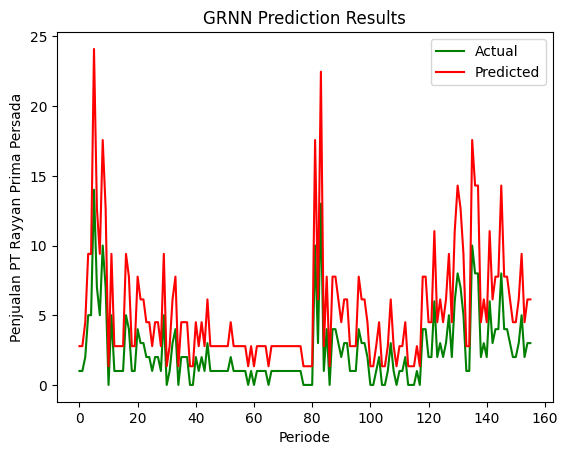

In [87]:
# Create line plot
plt.plot(Y, color='green', label='Actual')
plt.plot(Predict, color='red', label='Predicted')

# Add labels and legend
plt.xlabel('Periode')
plt.ylabel('Penjualan PT Rayyan Prima Persada')
plt.title('GRNN Prediction Results')
plt.legend()
# Show plot
plt.show()

In [88]:
# Hitung nilai MSE (Mean Squared Error)
mse = mean_squared_error(Y_test, Y_pred)
print('MSE:', mse)
# Menghitung RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
# Menghitung MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)
# Menghitung MAPE
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
print("Mean Absolute Percentage Error:", mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

MSE: 7.8696279678530825
Root Mean Squared Error: 2.8052857194683543
Mean Absolute Error: 1.5968864400831797
Mean Absolute Percentage Error: 41.94822226116021
Accuracy: 58.05 %.


In [89]:
# Memprediksi penjualan pada bulan Agustus
bulan_selanjutnya = [[157]]
penjualan_selanjutnya = MLP.predict(bulan_selanjutnya)

print("Penjualan pada bulan selanjutnya:", penjualan_selanjutnya)

Penjualan pada bulan selanjutnya: [257.68987926]


In [90]:
# Memprediksi penjualan pada bulan September
bulan_selanjutnya = [[158]]
penjualan_selanjutnya = MLP.predict(bulan_selanjutnya)

print("Penjualan pada bulan selanjutnya:", penjualan_selanjutnya)

Penjualan pada bulan selanjutnya: [259.32335806]


In [91]:
# Memprediksi penjualan pada bulan Oktober
bulan_selanjutnya = [[159]]
penjualan_selanjutnya = MLP.predict(bulan_selanjutnya)

print("Penjualan pada bulan selanjutnya:", penjualan_selanjutnya)

Penjualan pada bulan selanjutnya: [260.95683686]


In [92]:
# Memprediksi penjualan pada bulan November
bulan_selanjutnya = [[160]]
penjualan_selanjutnya = MLP.predict(bulan_selanjutnya)

print("Penjualan pada bulan selanjutnya:", penjualan_selanjutnya)

Penjualan pada bulan selanjutnya: [262.59031566]


In [93]:
# Memprediksi penjualan pada bulan Desember
bulan_selanjutnya = [[161]]
penjualan_selanjutnya = MLP.predict(bulan_selanjutnya)

print("Penjualan pada bulan selanjutnya:", penjualan_selanjutnya)

Penjualan pada bulan selanjutnya: [264.22379446]


# GBR

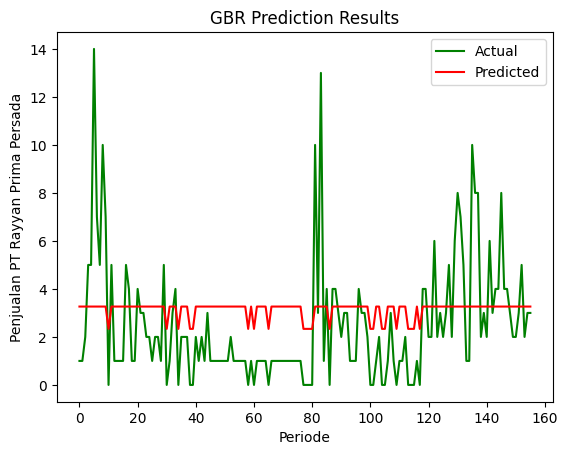

In [30]:
# Bagi data menjadi data training dan data testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
test_size=0.2, random_state=0)
# Membuat model Gradient Boosting Regressor
GBR = GradientBoostingRegressor(n_estimators=100,
learning_rate=0.1, max_depth=1, random_state=0)
# Melatih model
GBR.fit(X_train, Y_train)
# Memprediksi pada set pengujian
Y_pred = GBR.predict(X_test)
Y2 = Y.reshape(-1, 1)
Predict2 = GBR.predict(Y2)
Predict2
# Create line plot
plt.plot(Y, color='green', label='Actual')
plt.plot(Predict2, color='red', label='Predicted')
# Add labels and legend
plt.xlabel('Periode')
plt.ylabel('Penjualan PT Rayyan Prima Persada')
plt.title('GBR Prediction Results')
plt.legend()
# Show plot
plt.show()

In [31]:
# Menghitung mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)
# Menghitung RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
# Menghitung MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)
# Menghitung MAPE
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
print("Mean Absolute Percentage Error:", mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Squared Error: 7.0286692466794225
Root Mean Squared Error: 2.651163753275045
Mean Absolute Error: 1.616869909558225
Mean Absolute Percentage Error: 44.55417168649169
Accuracy: 55.45 %.


In [32]:
# Memprediksi penjualan pada bulan Agustus
bulan_selanjutnya = [[157]]
penjualan_selanjutnya = GBR.predict(bulan_selanjutnya)

print("Penjualan pada bulan selanjutnya:", penjualan_selanjutnya)

Penjualan pada bulan selanjutnya: [3.265192]


In [33]:
# Memprediksi penjualan pada bulan September
bulan_selanjutnya = [[158]]
penjualan_selanjutnya = GBR.predict(bulan_selanjutnya)

print("Penjualan pada bulan selanjutnya:", penjualan_selanjutnya)

Penjualan pada bulan selanjutnya: [3.265192]


In [34]:
# Memprediksi penjualan pada bulan Oktober
bulan_selanjutnya = [[159]]
penjualan_selanjutnya = GBR.predict(bulan_selanjutnya)

print("Penjualan pada bulan selanjutnya:", penjualan_selanjutnya)

Penjualan pada bulan selanjutnya: [3.265192]


In [35]:
# Memprediksi penjualan pada bulan November
bulan_selanjutnya = [[160]]
penjualan_selanjutnya = GBR.predict(bulan_selanjutnya)

print("Penjualan pada bulan selanjutnya:", penjualan_selanjutnya)

Penjualan pada bulan selanjutnya: [3.265192]


In [36]:
# Memprediksi penjualan pada bulan Desember
bulan_selanjutnya = [[161]]
penjualan_selanjutnya = GBR.predict(bulan_selanjutnya)

print("Penjualan pada bulan selanjutnya:", penjualan_selanjutnya)

Penjualan pada bulan selanjutnya: [3.265192]


# RFR

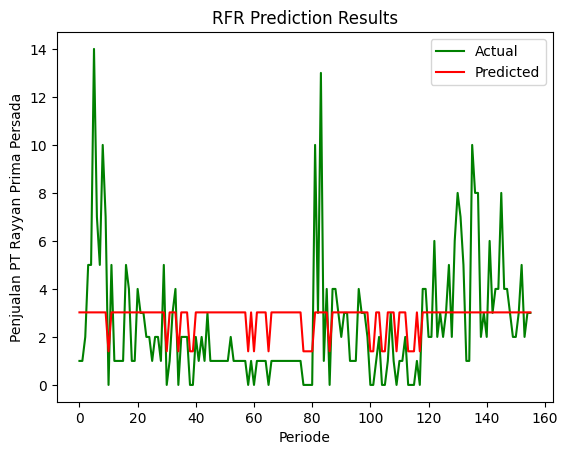

In [37]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
test_size=0.2, random_state=0)
# Membuat model Random Forest Regresi
RFR = RandomForestRegressor(n_estimators=100, random_state=0,
max_depth=4, min_samples_split=2)
# Melatih model
RFR.fit(X_train, Y_train)
# Memprediksi pada set pengujian
Y_pred = RFR.predict(X_test)
Y3 = Y.reshape(-1, 1)
Predict3 = RFR.predict(Y3)
Predict3
# Create line plot
plt.plot(Y, color='green', label='Actual')
plt.plot(Predict3, color='red', label='Predicted')
# Add labels and legend
plt.xlabel('Periode')
plt.ylabel('Penjualan PT Rayyan Prima Persada')
plt.title('RFR Prediction Results')
plt.legend()
# Show plot
plt.show()

In [38]:
# Menghitung mean squared error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)
# Menghitung RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
# Menghitung MAE
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)
# Menghitung MAPE
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
print("Mean Absolute Percentage Error:", mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Squared Error: 7.048728454258571
Root Mean Squared Error: 2.6549441527569972
Mean Absolute Error: 1.6459529752432493
Mean Absolute Percentage Error: 41.96763008329978
Accuracy: 58.03 %.


In [39]:
# Memprediksi penjualan pada bulan Agustus
bulan_selanjutnya = [[157]]
penjualan_selanjutnya = RFR.predict(bulan_selanjutnya)

print("Penjualan pada bulan selanjutnya:", penjualan_selanjutnya)

Penjualan pada bulan selanjutnya: [3.02263698]


In [40]:
# Memprediksi penjualan pada bulan September
bulan_selanjutnya = [[158]]
penjualan_selanjutnya = RFR.predict(bulan_selanjutnya)

print("Penjualan pada bulan selanjutnya:", penjualan_selanjutnya)

Penjualan pada bulan selanjutnya: [3.02263698]


In [41]:
# Memprediksi penjualan pada bulan Oktober
bulan_selanjutnya = [[159]]
penjualan_selanjutnya = RFR.predict(bulan_selanjutnya)

print("Penjualan pada bulan selanjutnya:", penjualan_selanjutnya)

Penjualan pada bulan selanjutnya: [3.02263698]


In [42]:
# Memprediksi penjualan pada bulan November
bulan_selanjutnya = [[160]]
penjualan_selanjutnya = RFR.predict(bulan_selanjutnya)

print("Penjualan pada bulan selanjutnya:", penjualan_selanjutnya)

Penjualan pada bulan selanjutnya: [3.02263698]


In [43]:
# Memprediksi penjualan pada bulan Desember
bulan_selanjutnya = [[161]]
penjualan_selanjutnya = RFR.predict(bulan_selanjutnya)

print("Penjualan pada bulan selanjutnya:", penjualan_selanjutnya)

Penjualan pada bulan selanjutnya: [3.02263698]
